# Tweet, tweets' text and sentiment analysis

###  - This project demonstrates a tweets analysis with tweets posted between October, 2021 and August, 2022 about Márki-Zay Péter who was not only the opponent of Orban Viktor in the Hungarian election in 2022 but also a controversial public member who has divided hungarians.
### -  Tweets were fetched from Twitter API with keyword search option.
### ( - Twitter API offers a keyword search option ensuring that get the most relevant tweets.)

In [1]:
!pip install wordcloud


[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install contractions
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import json
import datetime

import plotly
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

import html
import re
import contractions

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

import string

from wordcloud import WordCloud


[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv('Marki-Zay_mod01.csv', sep = ';')
df_loc = pd.read_csv('all_detected.csv', sep = ';')
scores = pd.read_csv('scores.csv', sep = ';')

# 1. Exploratory data analysis

## 1.1 Introduction of the dataset

##### columns: tweet_id, tweet_full_text, tweet_created_at, tweet_retweet_count, tweet_favorite_count, tweet_user_id, tweet_hashtags, user_name, user_screen_name, user_location, user_description, user_created_at, user_followers_count, user_friends_count, user_favourites_count, user_statuses_count, user_listed_count, tweet_language, original_tweet_id

In [4]:
df.head()

tweet_id                                    tweet_full_text  \
0  1448367197332459525  Egymásnak esve közeledett egymáshoz Dobrev Klá...   
1  1448365720690171905  RT @balazscseko: While the two remaining oppos...   
2  1448365408650682368  RT @balazscseko: While the two remaining oppos...   
3  1448363079255920649  RT @MiHazank: Hazaárulókat sem restell támogat...   
4  1448361274446856200  While the two remaining opposition candidates ...   

      tweet_created_at  tweet_retweet_count  tweet_favorite_count  \
0  2021-10-13 19:17:03                    0                     1   
1  2021-10-13 19:11:11                    2                     0   
2  2021-10-13 19:09:57                    2                     0   
3  2021-10-13 19:00:42                    3                     0   
4  2021-10-13 18:53:31                    2                     3   

         tweet_user_id tweet_hashtags       user_name user_screen_name  \
0             17021282             []          hvg.hu           hvg_hu   
1  1210634434434752513    ['Hungary']  Róbert Nádasdy          RNascal   
2             26786894    ['Hungary']      Lydia Gall            LydsG   
3   956210929661890561             []     Arany Gábor   Arany_Gabor_14   
4           1270678909    ['Hungary']    Balazs Csekö      balazscseko   

           user_location                                   user_description  \
0               Budapest  Ami mellett nem érdemes elmenni. Gyorshírek, a...   
1                    NaN  Szeretem a kihívásokat, repülést ejtőernyőzést...   
2               Budapest  Senior researcher on Eastern EU and Western Ba...   
3                    NaN                                                NaN   
4  Vienna, Budapest, CEE  Journalist & pol scientist. Author: Cuban Exil...   

       user_created_at  user_followers_count  user_friends_count  \
0  2008-10-28 13:57:54                369674                 461   
1  2019-12-27 18:53:13                   517                2402   
2  2009-03-26 16:32:50                  8855                 934   
3  2018-01-24 17:03:45                     2                  11   
4  2013-03-15 20:47:04                  7092                3154   

   user_favourites_count  user_statuses_count  user_listed_count  \
0                      1               158356                414   
1                  17652                78130                  3   
2                   2520                 6584                346   
3                   1303                   27                  0   
4                   3570                 8255                247   

  tweet_language    original_tweet_id  
0             hu                 None  
1             ro  1448361274446856200  
2             ro  1448361274446856200  
3             hu  1447995048809877511  
4             ro                 None

## 1.2 Number of tweets and retweets

In [5]:
print('Total:')
print(df['tweet_id'].count())

Total:
12685


In [6]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} tweets)".format(pct, absolute)


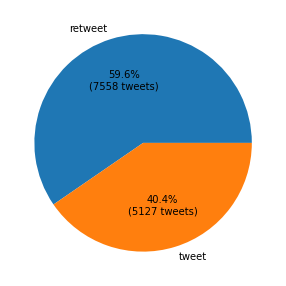

In [7]:
df.loc[df['original_tweet_id'] == 'None', 'retweet_tweet'] = 'tweet'
df['retweet_tweet'].fillna('retweet', inplace = True)

num_of_t = df.groupby('retweet_tweet')['tweet_id'].count()
fig = plt.figure(figsize = (5,5))

plt.pie(num_of_t,
        labels = num_of_t.index,
        autopct=lambda pct: func(pct, num_of_t))
plt.show()

## 1.3 Created at before and after the election

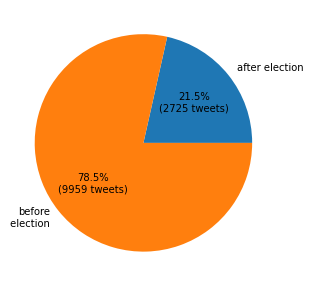

In [8]:
df.loc[df['tweet_created_at'] < '2022-04-03 00:00:00', 'before_after'] = 'before\n election'
df['before_after'].fillna('after election', inplace = True)

num_of_t_elect = df.groupby('before_after')['tweet_id'].count()
fig = plt.figure(figsize = (5,5))

plt.pie(num_of_t_elect,
        labels = num_of_t_elect.index,
        autopct=lambda pct: func(pct, num_of_t_elect))
plt.show()

## 1.4 Tweets timeline

In [9]:
print('Minimum date:')
print(df['tweet_created_at'].min())
print('Maximum date:')
print(df['tweet_created_at'].max())

Minimum date:
2021-10-05 07:24:49
Maximum date:
2022-08-04 07:39:14


### 1.4.1 All tweets

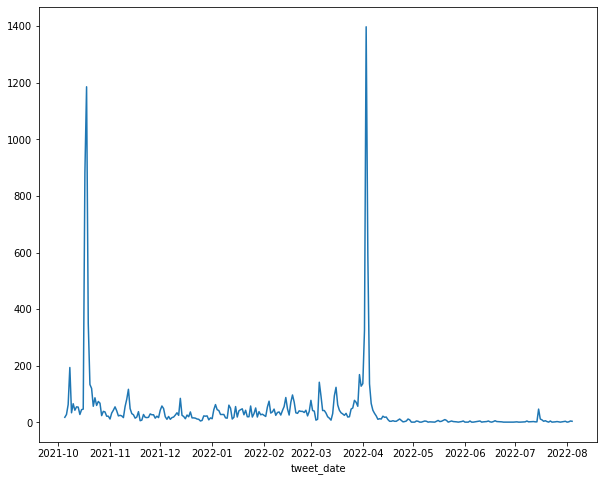

In [10]:
df['tweet_date'] = pd.to_datetime(df['tweet_created_at']).dt.date
df.groupby(['tweet_date'])['tweet_id'].count()\
.plot(kind = 'line', figsize = (10, 8))
plt.show()

### 1.4.2 Only tweets (without retweets)

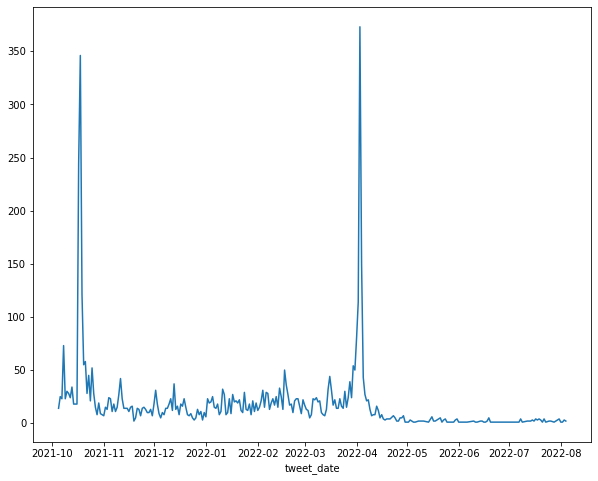

In [11]:
df[df['original_tweet_id'] == 'None']\
.groupby(['tweet_date'])['tweet_id'].count()\
.plot(kind = 'line', figsize = (10, 8))
plt.show()

## 1.5 Tweets language

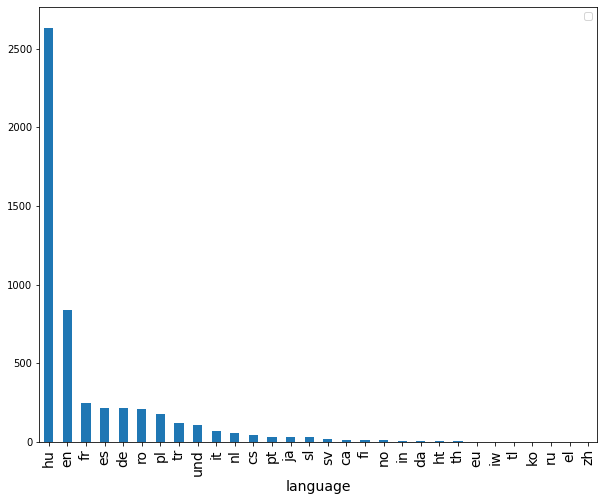

In [12]:
df[df['original_tweet_id'] == 'None']\
    .groupby(['tweet_language'], as_index = False)['tweet_id'].count()\
    .sort_values('tweet_id', ascending = False)\
    .set_index('tweet_language')\
    .plot(kind = 'bar', figsize = (10, 8))
plt.xticks(fontsize=14)
plt.xlabel('language', fontsize=14)
plt.legend('')
plt.show()

## 1.6 Used hashtags

In [13]:
dictionary = {}
for x,y in df.iterrows():
    res = []
    res = json.loads(y['tweet_hashtags'].replace('\'', '"'))
    for i in res:
        if i in dictionary.keys():
            dictionary[i]+=1
        else:
            dictionary[i]=1

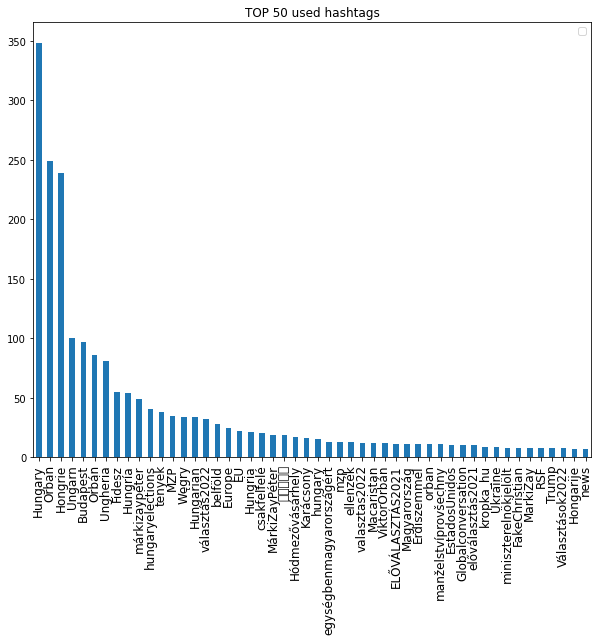

In [14]:
hashtags = pd.DataFrame\
          .from_dict(dictionary, orient = 'index')\
          .rename(columns = {0: 'count'})\
          .sort_values('count', ascending = False)

hashtags.head(50)\
        .plot(kind = 'bar',figsize = (10, 8))
        
plt.title('TOP 50 used hashtags')
plt.legend('')
plt.xticks(fontsize=12)
plt.xlabel('')
plt.show()

In [15]:
print('Hashtag with unrecognized charachters')
print(hashtags.index[22])

Hashtag with unrecognized charachters
ハンガリー


## 1.7 Tweet location

In [16]:
color_dict = {"Hungary": "orange",
"Czech Republic": "indigo",
"Sweden": "crimson",
"Switzerland": "magenta",
"Austria": "lime",
"Poland": "chocolate",
"France": "olive",
"Europe": "coral",
"Belgium": "kaki",
"Germany": "black",
"United States": "darkcyan",
"Netherlands": "red",
"United Kingdom": "green",
"Belgium": "plum",
"Slovenia": "kaki",
"Spain": "gold",
"Turkey": "silver",
"Italy": "sienna",
"Other": "teal",
"Slovak Republic": "royalblue",
"Kenya": "aquamarine",
"Austria": "tan",
"Other": "olivedrab",
"Norway": "thistle",
"Japan": "greenyellow",
"Puerto Rico": "violet",
"Canada": "rosybrown",
"Slovenia": "purple",
"Turkey": "deeppink",
"Australia": "yellow"}

### 1.7.1 Location exists for tweets and retweets

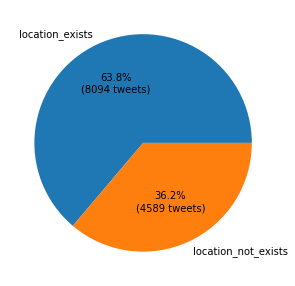

In [17]:
df.loc[df['user_location'].isnull(), 'location'] = 'location_not_exists'
df['location'].fillna('location_exists', inplace = True)

df_loc_exists = df.groupby(['location'])['tweet_id'].count()

fig = plt.figure(figsize = (5,5))

plt.pie(df_loc_exists,
        labels = df_loc_exists.index,
        autopct=lambda pct: func(pct, df_loc_exists))
plt.show()

### 1.7.2 Location exists for only tweets

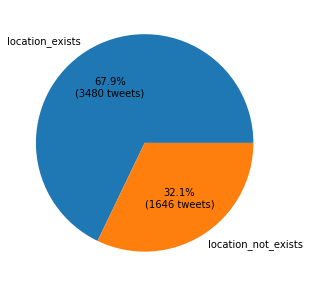

In [18]:
df_loc_exists_tweet = df[df['original_tweet_id'] == 'None']\
.groupby(['location'])['tweet_id'].count()

fig = plt.figure(figsize = (5,5))

plt.pie(df_loc_exists_tweet,
        labels = df_loc_exists_tweet.index,
        autopct=lambda pct: func(pct, df_loc_exists_tweet))
plt.show()

### 1.7.3 Detected country list
#### - Tweeters' country was detected from the user_location column by using a custom detection script

In [19]:
df_detected_locations = df[df['location'] == 'location_exists']\
                        .merge(df_loc, on = 'tweet_id', how = 'outer')
                        
df_detected_locations.loc[df_detected_locations['country'] == 'HUNGARY', 'country'] = 'Hungary'
df_detected_locations.loc[df_detected_locations['country'] == 'FRANCE', 'country'] = 'France'
df_detected_locations.loc[df_detected_locations['country'] == 'CHILE', 'country'] = 'Chile'
df_detected_locations.loc[df_detected_locations['country'] == 'TURKEY', 'country'] = 'Turkey'
df_detected_locations.loc[df_detected_locations['country'] == 'INDIA', 'country'] = 'India'
df_detected_locations.loc[df_detected_locations['country'] == 'ARGENTINA', 'country'] = 'Argentina'
df_detected_locations.loc[df_detected_locations['country'] == 'Czechia', 'country'] =  'Czech Republic'
df_detected_locations.loc[df_detected_locations['country'] == 'Slovakia', 'country'] =  'Slovak Republic'
df_detected_locations.loc[df_detected_locations['country'] == 'Serbia', 'country'] =  'Republic of Serbia'
df_detected_locations.loc[df_detected_locations['country'] == 'Poland ', 'country'] =  'Poland'
df_detected_locations.loc[df_detected_locations['country'] == 'England', 'country'] = 'United Kingdom'



df_detected_locations['country'].fillna('Other', inplace = True)

df_detected_locations\
.loc[df_detected_locations['user_location'].str.contains('Nederland'), 'country'] = 'Netherlands'
df_detected_locations\
.loc[df_detected_locations['user_location'].str.contains('Amsterdam'), 'country'] = 'Netherlands'
df_detected_locations\
.loc[df_detected_locations['user_location'].str.contains('United Kingdom'), 'country'] = 'United Kingdom'
df_detected_locations\
.loc[df_detected_locations['user_location'].str.contains('England'), 'country'] = 'United Kingdom'

In [20]:
df_detected_locations\
.groupby(['country'], as_index = False)['tweet_id'].count()\
.rename(columns = {'tweet_id': 'number_of_tweets'})\
.sort_values('number_of_tweets', ascending = False)

country  number_of_tweets
35                                 Hungary              2580
62                                   Other              1750
88                           United States               626
26                                  France               425
87                          United Kingdom               358
28                                 Germany               350
66                                  Poland               268
79                                   Spain               179
7                                  Belgium               147
41                                   Italy               113
57                             Netherlands               111
80                                  Sweden                90
3                                  Austria                89
24                                  Europe                74
17                          Czech Republic                68
84                                  Turkey                66
11                                  Canada                65
76                                Slovenia                62
25                                 Finland                46
81                             Switzerland                40
61                                  Norway                36
1                                Argentina                35
75                         Slovak Republic                35
2                                Australia                35
64                                    Peru                33
9                                   Brazil                28
71                                 Romania                25
37                                   India                25
67                                Portugal                22
12                                   Chile                21
39                                 Ireland                18
53                                  Mexico                17
43                                   Japan                16
94                                   World                13
68                             Puerto Rico                12
92                               Venezuela                12
85                                 Ukraine                12
18                                 Denmark                11
70                      Republic of Serbia                11
45                                   Kenya                10
96                                   india                 8
29                                  Greece                 8
93       Venezuela, Bolivarian Republic of                 8
38                               Indonesia                 7
14                                Colombia                 7
23                                 Estonia                 7
40                                  Israel                 6
27                                 Georgia                 5
78                            South Africa                 5
51                                Malaysia                 5
16                                 Croatia                 5
34                               Hong Kong                 5
90                                 Uruguay                 4
10                                Bulgaria                 4
63                                Pakistan                 4
22                             El Salvador                 4
59                                 Nigeria                 4
52                                   Malta                 4
54                                 Morocco                 4
86                    United Arab Emirates                 3
36                                 Iceland                 3
50                              Luxembourg                 3
47                                  Latvia                 3
55                                 Myanmar                 3
89                United States of America                 2
65       

### 1.7.4 Top 20 countries of all tweets

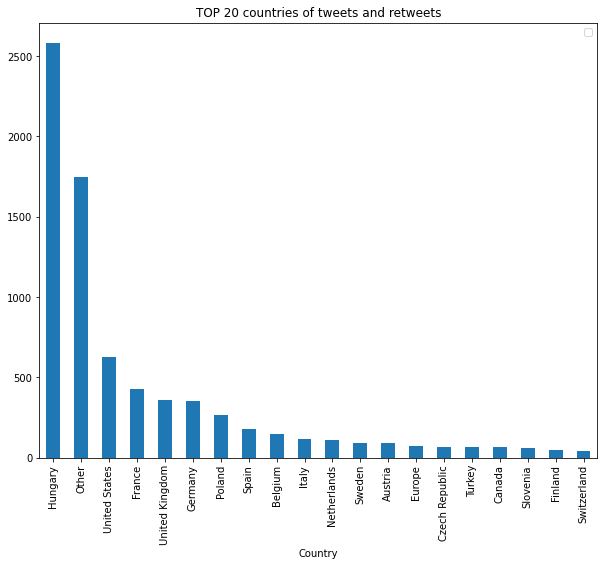

In [21]:
df_detected_locations\
.groupby(['country'], as_index = False)['tweet_id'].count()\
.sort_values('tweet_id', ascending = False).set_index('country').head(20)\
.plot(kind = 'bar',figsize = (10, 8))

plt.legend('')
plt.title('TOP 20 countries of tweets and retweets')
plt.xlabel('Country')
plt.show()

### 1.7.5 Top 20 countries of only tweets

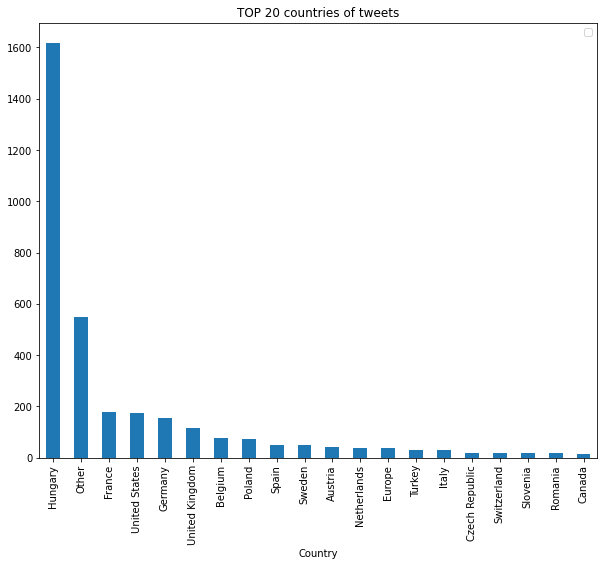

In [22]:
df_detected_locations[df_detected_locations['original_tweet_id'] == 'None']\
.groupby(['country'], as_index = False)['tweet_id'].count()\
.sort_values('tweet_id', ascending = False).set_index('country').head(20)\
.plot(kind = 'bar',figsize = (10, 8))

plt.legend('')
plt.title('TOP 20 countries of tweets')
plt.xlabel('Country')
plt.show()

### 1.7.6 Top 50 original user locations of all tweets

In [23]:
df[df['location']== 'location_exists']\
.groupby('user_location', as_index = False)['tweet_id'].count()\
.sort_values('tweet_id', ascending = False)\
.rename(columns = {'tweet_id': 'number_of_tweets'})\
.head(50)

user_location  number_of_tweets
355                Budapest, Hungary               406
341                         Budapest               402
361           Budapest, Magyarország               264
6      Budapest, Hungary                           187
1192                    Magyarország               186
931                 Hódmezővásárhely               165
915                          Hungary               151
1725                 SZEGED, HUNGARY               138
2244                        budapest               118
2375      Ózd, Magyarország, Hungary               103
1581                          Polska                69
2139                Warszawa, Polska                68
1507                           Paris                66
728                           France                60
666                           Europe                55
2082               Velence / Hungary                55
312                         Brussels                55
1522                   Paris, France                53
1133                          London                52
314                Brussels, Belgium                48
781                          Germany                46
1224                Mare Moscoviense                43
1145                 London, England                42
1883                          Sweden                42
2180                Wien, Österreich                40
205                           Berlin                39
218                  Berlin, Germany                36
1897       Szombathely, Magyarország                35
1571                          Poland                34
2035                   United States                34
2100                 Vienna, Austria                33
556                      Deutschland                33
2133                        Warszawa                32
354                Budapest, Hongrie                29
2097                          Vienna                29
1863               Stockholm, Sweden                28
2152                  Washington, DC                28
1894             Szentendre, Hungary                28
2130                  Warsaw, Poland                26
1892            Szeged, Magyarország                26
507                     Csíkszereda                 25
650                           España                24
1198          Magyarország, Budapest                23
214              Berlin, Deutschland                22
2276                       hong kong                22
2385               İstanbul, Türkiye                22
403                  California, USA                21
964                           Italia                20
795                            Globe                19
1619          Prague, Czech Republic                19

### 1.7.7 Sankey chart with locations
#### - Where retweeters located who reposted tweets made from TOP locations

In [24]:
top_20_country_list = df_detected_locations[(df_detected_locations['original_tweet_id'] == 'None')&
                      (df_detected_locations['country'] != 'Other')]\
                      .groupby('country', as_index = False)['tweet_id'].count()\
                      .sort_values('tweet_id', ascending = False)\
                      .head(19)['country'].values.tolist()

In [25]:
df_retweets_detected=df_detected_locations[(df_detected_locations['original_tweet_id'] != 'None')]\
                                            [['tweet_id', 'country', 'original_tweet_id']]

df_retweets_detected['original_tweet_id'] = df_retweets_detected['original_tweet_id'].astype('int64')

df_detected_merge = df_detected_locations[(df_detected_locations['original_tweet_id'] == 'None')&
                      (df_detected_locations['country'].isin(top_20_country_list))][['tweet_id', 'country']]\
                        .merge(df_retweets_detected,
                                left_on = 'tweet_id',
                                right_on = 'original_tweet_id',
                                how = 'inner')

In [26]:
df_sankey = df_detected_merge.groupby(['country_x', 'country_y'], as_index = False)['tweet_id_x'].count()

In [27]:
df_sankey = df_detected_merge.groupby(['country_x', 'country_y'], as_index = False)['tweet_id_x'].count()
df_sankey.columns = ['source', 'target', 'value']
df_sankey['source'] = 'Tweeted_in_' + df_sankey['source'].astype(str)
df_sankey['target'] = 'Retweeted_in_' + df_sankey['target'].astype(str)

In [28]:
unique_source_target = list(pd.unique(df_sankey[['source', 'target']].values.ravel('K')))

In [29]:
color_list = []
pattern = r'(?<=in_)([\w ]+)'
for i in unique_source_target:
    x = re.split(pattern, i)[1] 
    if x in color_dict.keys():
        color_list.append(color_dict[x])
    else:
        color_list.append("blue")


In [30]:
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
df_sankey['source'] =df_sankey['source'].map(mapping_dict)
df_sankey['target'] =df_sankey['target'].map(mapping_dict)
sankey_dict = df_sankey.to_dict(orient = 'list')

In [31]:
fig = go.Figure(
    data = [go.Sankey(
        node = dict(
            pad = 15, 
            thickness = 20,
            line = dict(color = 'black', width = 0.5),
            label = unique_source_target,
            color = color_list
        ),

        link = dict(
            source = sankey_dict['source'],
            target = sankey_dict['target'],
            value = sankey_dict['value']
        )
      )]
    )


In [32]:
fig.update_layout(autosize=False,
    width=1000,
    height=1500)
fig.show()

## 1.8 Tweets of Media and news company accounts

In [33]:
hun = ['hvg_hu',
'Katapultmagazin',
'indexhu',
'euronewshu',
'Atlatszo',
'Telexhu',
'magyar_hirlap',
'DNewsHungary']

international = ['TheEconomist',
'lemondefr',
'the_hindu',
'France24_fr',
'elmundoes',
'bbcturkce',
'Le_Figaro',
'libe',
'derspiegel',
'Mediapart',
'Corriere',
'zeitonline',
'AFP',
'RevistaISTOE',
'republikaonline',
'tvn24',
'rtvenoticias',
'lobs',
'LEXPRESS',
'europapress',
'sternde',
'NOS',
'eldiarioes',
'Internazionale',
'rtve',
'dw_espanol',
'elconfidencial',
'LePoint',
'ZDFheute',
'tvcultura',
'SinarOnline',
'correio',
'SCMPNews',
'Publico',
'nytopinion',
'gazeta_wyborcza',
'euronews_tr',
'faznet',
'gazeteduvar',
'tazgezwitscher',
'nrc',
'OuestFrance',
'larazon_es',
'ilgiornale',
'dwnews',
'euronews',
'expresso',
'vrtnws',
'Tagesspiegel',
'NZZ',
'trtworld',
'DIEZEIT',
'sudouest',
'lesoir',
'elpais_america',
'RTBFinfo',
'humanite_fr',
'courrierinter',
'descifraguerra',
'ArtiTV_',
'srfnews',
'France24_en',
'Linkiesta',
'POLITICOEurope',
'TSFRadio',
'LaTribunahn',
'Tg3web',
'Medyascopetv',
'medyascope',
'Reuters_Health',
'lalibrebe',
'TelegraphWorld',
'ilfoglio_it',
'Polityka_pl',
'visegrad24',
'SZ_TopNews',
'TV5MONDEINFO',
'observadorpt',
'Medyanin50Tonu',
'euobs',
'cicero_online',
'oko_press',
'SPIEGEL_English',
'RSF_inter',
'RFERL',
'HLN_BE',
'TRTWorldNow',
'zeitonline_pol',
'RMF24pl',
'EURACTIV',
'laderechadiario',
'openDemocracy',
'PolsatNewsPL',
'France24_es',
'EuropeElects',
'wirtualnapolska',
'wPolityce_pl',
'SPIEGEL_alles',
'Lematinch',
'News_8',
'dw_deutsch',
'Loopsidernews',
'SZ_Politik',
'DiePressecom',
'lopinion_fr',
'euronewses',
'Knack',
'rtvslo',
'Morgenbladet',
'RadioZET_NEWS',
'NPORadio1',
'visegrad24',
'USRealityCheck',
'DeGroene',
'euronewsfr',
'Delo',
'FAZ_NET',
'LaCroix',
'BR24',
'BalkanInsight',
'kleinezeitung',
'ftbrussels',
'DziennikPL',
'LeTemps',
'WienerZeitung',
'ips_journal',
'KCBSRadio',
'F24videos',
'PR24_pl',
'agerpres',
'serbestiyetweb',
'RND_de',
'euronewspt',
'RFImag',
'romanialibera',
'vecer',
'noticiaaominuto',
'tyzdensk',
'Kontrast_at',
'dosmanzanas',
'DiePresse_Pol',
'OSW_pl',
'Ziare_com',
'VisegradInsight',
'TheWeekUK',
'VisegradInsight',
'ndnl',
'vorwaerts',
'euronewsde',
'euronewsit',
'CEuropeCentrale']



In [34]:
 users_stat = df[df['original_tweet_id'] == 'None']\
              .groupby(['user_screen_name'], as_index = False)\
              .agg(max_followers =('user_followers_count', 'max'),
                  tweet_count =('tweet_id', 'count'))\
              .sort_values('user_screen_name')

In [35]:
cds_df = df[df['original_tweet_id'] == 'None']\
        .merge(users_stat[['user_screen_name','max_followers', 'tweet_count']],
               on = 'user_screen_name',
               how = 'left')
        
cds_df.sort_values('tweet_created_at',ascending = True)
cds_df['tweet_created_at'] = pd.to_datetime(cds_df['tweet_created_at']).dt.date

In [36]:
cds_df = cds_df[['tweet_full_text', 'tweet_created_at', 'tweet_hashtags', 'max_followers', 'tweet_count' ,'user_screen_name', 'user_name']]

cds_df.loc[cds_df['user_screen_name'].isin(hun), 'media_category'] = 'hungarian_news_service'
cds_df.loc[cds_df['user_screen_name'].isin(international), 'media_category'] = 'international_news_service'
cds_df['media_category'].fillna('other_twitter_user', inplace = True)

cds_df.loc[cds_df['media_category'] != 'other_twitter_user', 'media_name'] = cds_df['user_name']
cds_df['media_name'].fillna('twitter_user', inplace = True)

cds_df['date'] = cds_df['tweet_created_at'].astype('str').str.replace('-', '').str[2:].astype('int32')


In [37]:
cds_df = cds_df[cds_df['media_name'] != 'twitter_user']
cds_df['index'] = cds_df.groupby('tweet_created_at').cumcount()

cds_df.loc[(cds_df['media_category'] == 'international_news_service')&
       (cds_df['max_followers']> 10000),'account_tpye'] = 'internartional between 10 000 and 50 000 followers'
cds_df.loc[(cds_df['media_category'] == 'international_news_service')&
       (cds_df['max_followers']> 50000),'account_tpye'] = 'internartional between 50 000 and 100 000 followers'
cds_df.loc[(cds_df['media_category'] == 'international_news_service')&
       (cds_df['max_followers']> 100000),'account_tpye'] = 'internartional above 100 000 followers'
cds_df.loc[(cds_df['media_category'] == 'hungarian_news_service'),'account_tpye'] = 'hungarian'
cds_df['account_tpye'].fillna('internartional below 10 000 followers', inplace = True)

color_discrete_map = {'internartional above 100 000 followers':'brown',
                      'internartional between 50 000 and 100 000 followers':'gold',
                      'internartional between 10 000 and 50 000 followers': 'khaki',
                      'hungarian': 'blue',
                      'internartional below 10 000 followers': 'limegreen'}

In [38]:
def text_chunking(text):
    count = -1
    x = 1
    text_ch = '<br>' + text
    for i in text:
        count += 1
        if count != 0 and count % 40 == 0:
            text_ch = text_ch[0:count + 4 * x] + '<br>' + text_ch[count + 4 * x:]
            x+=1
    return text_ch

In [39]:
cds_df['tweet_text_chunks'] = cds_df['tweet_full_text'].apply(lambda x: text_chunking(x))

In [40]:
fig = px.scatter(cds_df, 
                 x="tweet_created_at",
                 y="index",
                 color='account_tpye',
                 color_discrete_map=color_discrete_map,
                 width=1000,
                 height=750,
                 hover_data=['media_name', 'max_followers', 'date', 'tweet_count', 'tweet_hashtags', 'tweet_text_chunks'])
fig.update_traces(marker=dict(size=8))
fig.update_layout(xaxis=dict(tickformat=":1.0f"),
                  xaxis_title='Tweet date',
                  yaxis_title='',
                  legend_title='Media account type')
fig.update_xaxes(tickformat="%Y-%m-%d",tickangle=270)
fig.update_xaxes(tickvals=['2021-11-01','2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01','2022-05-01', '2022-06-01', '2022-07-01'])
fig.show()

## 1.9 Retweets

In [41]:
retweets = df[df['original_tweet_id']!= 'None']\
.groupby('original_tweet_id', as_index = False)['tweet_id'].count()\
.sort_values('tweet_id', ascending = False)
retweets['original_tweet_id'] = retweets['original_tweet_id'].astype('int64')

most_retweeted = retweets\
          .merge(df[['tweet_id','tweet_full_text', 'tweet_created_at', 'user_screen_name', 'tweet_language', 'user_location']],
                right_on = 'tweet_id',
                left_on = 'original_tweet_id',
                how = 'left')
del most_retweeted['tweet_id_y']

### 1.9.1 Retweets count based on language

In [42]:
most_retweeted.groupby('tweet_language')['tweet_id_x'].sum()\
              .reset_index()\
              .sort_values('tweet_id_x', ascending = False)\
              .rename(columns={'tweet_id_x': 'number_of_retweets'})

tweet_language  number_of_retweets
4              en                2664
9              hu                1753
15             pl                 785
5              es                 489
17             ro                 427
8              fr                 378
3              de                 263
10             it                 169
21             tr                 161
22            und                 118
1              cs                  90
13             nl                  55
18             sl                  53
16             pt                  37
0              ca                  26
7              fi                  21
19             sv                  13
20             th                  10
12             ja                   8
14             no                   4
11             iw                   3
2              da                   2
23             zh                   2
6              eu                   1

### 1.9.2 Retweets count based on date

In [43]:
most_retweeted['tweet_created_at_day'] = pd.to_datetime(most_retweeted['tweet_created_at']).dt.date
most_retweeted['tweet_created_at_month'] = pd.to_datetime(most_retweeted['tweet_created_at']).dt.month
most_retweeted.groupby('tweet_created_at_day')['tweet_id_x'].sum()\
              .reset_index()\
              .sort_values('tweet_id_x', ascending = False)\
              .rename(columns = {'tweet_id_x': 'number_of_retweets'})\
              .head(20)

tweet_created_at_day  number_of_retweets
179           2022-04-03                1192
12            2021-10-17                 988
13            2021-10-18                 609
178           2022-04-02                 306
180           2022-04-04                 202
151           2022-03-06                 169
14            2021-10-19                 145
175           2022-03-30                 133
3             2021-10-08                 115
37            2021-11-12                 103
161           2022-03-16                  81
2             2021-10-07                  75
15            2021-10-20                  75
135           2022-02-18                  72
160           2022-03-15                  71
130           2022-02-13                  70
146           2022-03-01                  68
172           2022-03-27                  60
181           2022-04-05                  58
177           2022-04-01                  57

### 1.9.3 Retweets count based on month

In [44]:
most_retweeted.groupby('tweet_created_at_month')['tweet_id_x'].sum()\
              .reset_index()\
              .rename(columns = {'tweet_id_x': 'number_of_retweets'})\
              .sort_values('number_of_retweets', ascending = False)

tweet_created_at_month  number_of_retweets
8                     10.0                2459
3                      4.0                1935
2                      3.0                1039
1                      2.0                 640
0                      1.0                 519
9                     11.0                 502
10                    12.0                 323
6                      7.0                  69
4                      5.0                  24
5                      6.0                  17
7                      8.0                   5

### 1.9.4 TOP 20 most retweeted tweets with text

In [45]:
pd.set_option('display.max_colwidth', None)
most_retweeted[['tweet_id_x','tweet_created_at','user_location','tweet_full_text']].head(20)

tweet_id_x     tweet_created_at               user_location  \
0          289  2021-10-18 14:17:06             Warszawa Polska   
1          170  2021-10-17 23:00:06                         NaN   
2          134  2022-03-06 17:57:20           Brussels/Budapest   
3          132  2022-04-03 19:35:21                    Budapest   
4          111  2022-04-03 21:39:30      London, Bxl, Paris, EU   
5           90  2021-11-12 11:35:56             Warszawa Polska   
6           85  2021-10-17 18:51:40           Brussels-Budapest   
7           82  2022-04-03 13:59:56               United States   
8           68  2022-04-03 10:03:13           Brussels, Belgium   
9           61  2021-10-17 16:44:48           Brussels, Belgium   
10          60  2021-10-17 18:44:06           Budapest, Hungary   
11          59  2021-10-17 13:09:05      Budapest, Magyarország   
12          58  2022-03-01 19:21:27      Budapest, Magyarország   
13          54  2021-10-07 17:23:59      Budapest, Magyarország   
14          50  2021-10-17 20:31:24    Oberroßbach, Deutschland   
15          49  2021-10-17 21:00:55      Budapest, Magyarország   
16          48  2022-04-03 19:22:56                    Budapest   
17          48  2022-03-30 09:59:01                         NaN   
18          47  2022-04-05 15:49:44     Greifswald, Deutschland   
19          47  2022-07-15 05:44:46  Washington, Prague, & more   

                                                                                                                                                                                                                                                                                                        tweet_full_text  
0                                                                                             Wspólny kandydat  opozycji na premiera Węgier Péter Márki-Zay konkretnie:\n„Wsadzę za kraty tych którzy kradli   z państwowych funduszy i zlikwiduję przepisy dzięki którym wzmacniał się Orban”. https://t.co/Inf3PNQxLA  
1                                    Hungary's opposition (parties from left to right) coalesced to hold a primary this week to choose one candidate who'll go up against the authoritarian Viktor  Orbán  in the upcoming elections, &amp; not divide the vote.\n\nThe winner:  Péter Márki-Zay, a conservative mayor.  
2                                                                                                         Hungarian opposition candidate Péter Márki-Zay now addressing protesters in front of state media headquarters. They are demanding an end to Russian propaganda on Hungarian state TV. https://t.co/zKnfsNDu3l  
3                                                                                                                                 The political future of Péter Márki-Zay is over.  Anointed candidate of the opposition, he promised to “bring Europe to Hungary.”  * He lost by ten points in his own district. *  🇭🇺  
4                                                                                                    Peter Marki-Zay gracefully accepts Viktor Orban and Fidesz' victory   But adds: even Hitler would have got two-thirds under the system Orban has built  "He who's a thief is a thief, he who's decent, is decent."  
5             Péter Márki-Zay - człowiek który chce pozbawić Victora Orbana funkcji premiera :\nNie rozumiem tej „przyjaźni polsko-węgierskiej”, która kwitnie w części polskiej prawicy. Uważający się za patriotów Polacy nie tylko akceptują, ale popierają Orbána, który jest sługą Putina. https://t.co/HchRHd3U8G  
6                                         Congratulations to Peter Marki-Zay for his amazing victory tonight! \n\nHe will be the candidate leading our united opposition to victory. Together, we’ll put an end to the Orban regime and we’ll give a fresh start to our country. Let’s do this! https://t.co/eIScap7NC6  
7                          Would be great for #Hungary, Europe and world peace if Vi

# 2. Text analysis

## 2.1 Distribution of word counts in tweet text

In [46]:
def _fix_contractions(tweet):
    for k, v in contractions.contractions_dict.items():
        tweet =tweet.replace(k,v)
    return tweet

In [47]:
def _remove_punctuation(tweet):
    token_list = word_tokenize(tweet)
    token_list = [token for token in token_list if token not in string.punctuation]
    return token_list

In [48]:
tweets = df[df['original_tweet_id'] == 'None']
tweets['tweet_full_text_processed'] = tweets['tweet_full_text'].apply(lambda x: x.replace("\xa0", "").replace("\\\\n", " ").replace('\r\n', ' ').replace("\r", "").replace("\\n", " ").replace("\xa0", "").replace("\xc2\xa0", "").replace("\\xc2\\xa0", "").replace("\u2066", "").replace("\u2069", "").replace("\n", " "))
#convert html charachters
tweets['tweet_full_text_processed'] = tweets['tweet_full_text_processed'].apply(lambda x: html.unescape(x))
#remove links
tweets['tweet_full_text_processed'] = tweets['tweet_full_text_processed'].apply(lambda x: re.sub('(http|https):\/\/\S+', "", x))
#remove hashtags
tweets['tweet_full_text_processed'] = tweets['tweet_full_text_processed'].apply(lambda x: re.sub('#+', " ", x))
#df_tweet['tweet_full_text_to_vader'] = df_tweet['tweet_full_text_to_vader'].apply(lambda x: re.sub(' +', ' ', x))
#convert @ to twitteruserword
tweets['tweet_full_text_processed'] = tweets['tweet_full_text_processed'].apply(lambda x: re.sub('\B@\w+', "twitteruser", x))
#convert slang -in' to -ing at the end of the words
tweets['tweet_full_text_processed'] = tweets['tweet_full_text_processed'].apply(lambda x: re.sub('\Bin\'\B', 'ing', x))


In [49]:
tweets['tweet_full_text_overprocessed'] = tweets['tweet_full_text_processed'].apply(lambda x: _fix_contractions(x))
tweets['tweet_full_text_overprocessed'] = tweets['tweet_full_text_overprocessed'].apply(lambda x: _remove_punctuation(x))
tweets['word_count'] = tweets['tweet_full_text_overprocessed'].apply(lambda x: len(x))


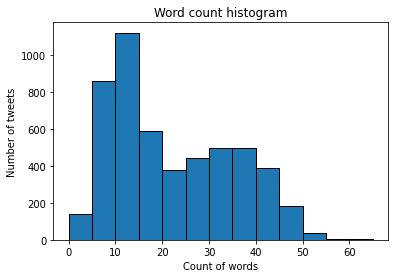

In [50]:
bins = [0, 5, 10,15,20, 25,30,35,40,45,50,55,60,65]

tweets['word_count'].plot(kind = 'hist', edgecolor = 'black', bins = bins)
plt.title('Word count histogram')
plt.xlabel('Count of words')
plt.ylabel('Number of tweets')
plt.show()

## 2.2 Wordclouds

### 2.2.1 Wordcloud of english tweets

In [51]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('twitteruser')
stopwords.append('Márki')
stopwords.append('Zay')
stopwords.append('Marki')
stopwords.append('Peter')
stopwords.append('Péter')

In [52]:
tweets_eng = tweets[tweets['tweet_language'] == 'en'][['tweet_full_text_processed']]

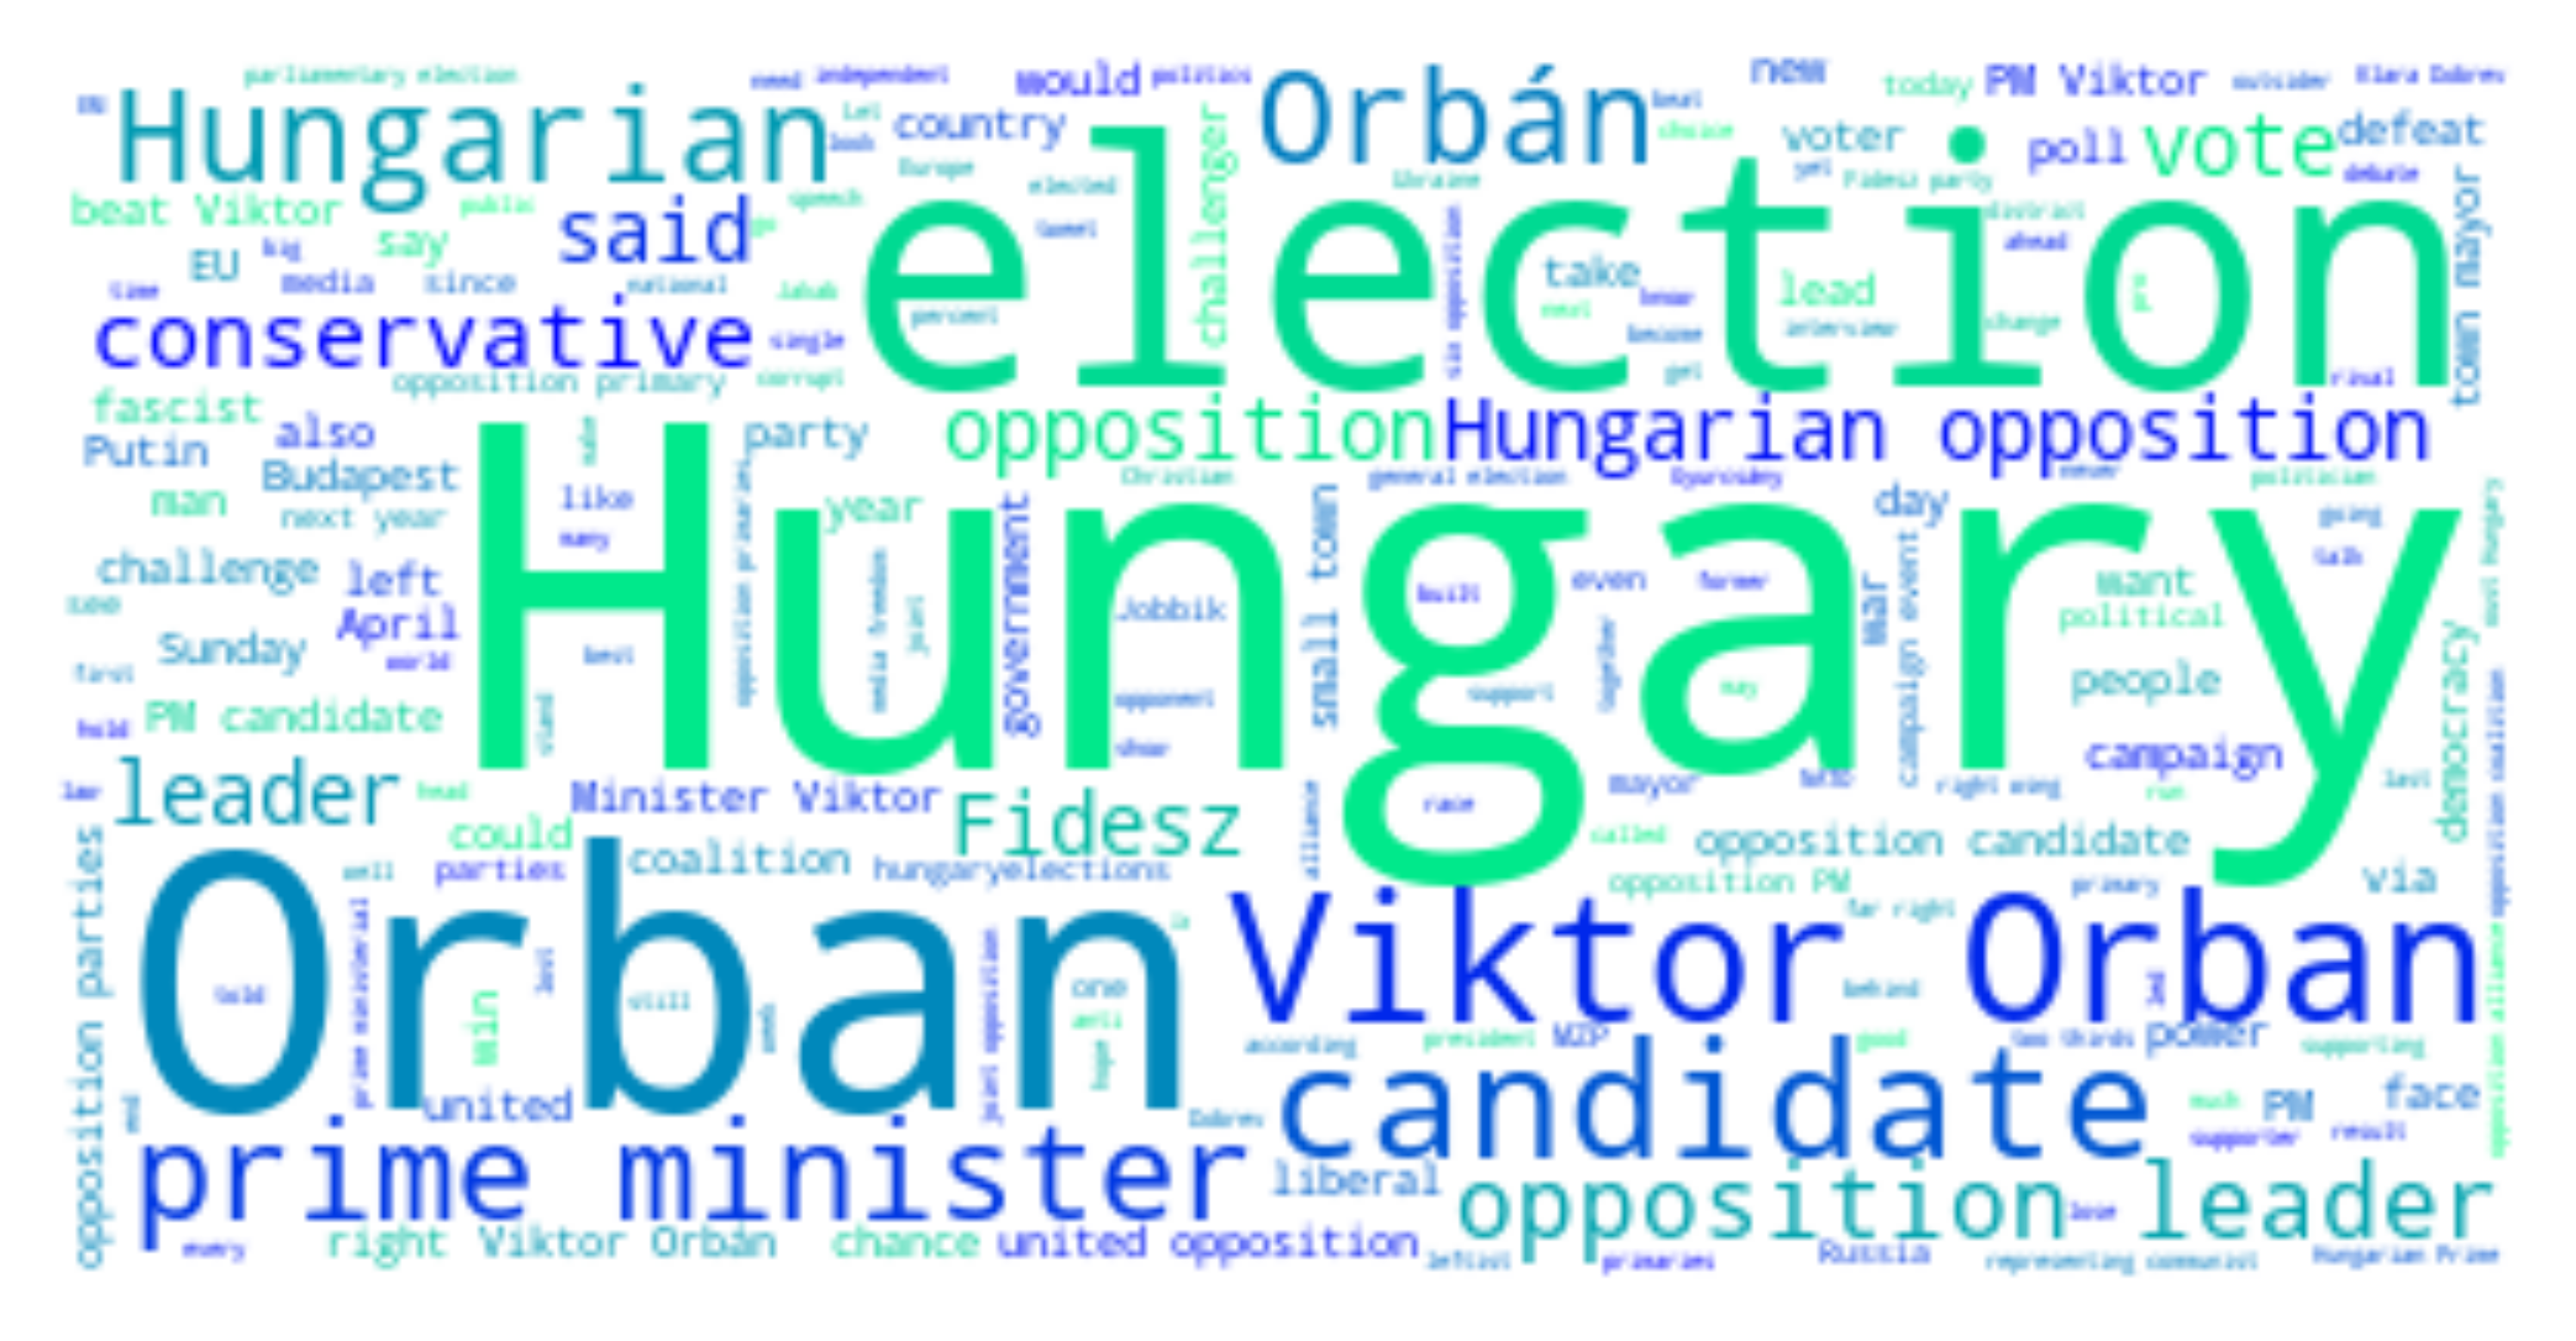

In [53]:
txt = " ".join(tweet for tweet in tweets_eng['tweet_full_text_processed'])
wordcloud = WordCloud(stopwords=stopwords, background_color ='white', colormap='winter').generate(txt)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.gcf().set_dpi(600)
plt.show()

### 2.2.2 Wordcloud of hungarian tweets

In [54]:
stopwords = nltk.corpus.stopwords.words('hungarian')
stopwords.append('twitteruser')
stopwords.append('Márki')
stopwords.append('Zay')
stopwords.append('Marki')
stopwords.append('Peter')
stopwords.append('Péter')
stopwords.append('i')

In [55]:
tweets_hu = tweets[tweets['tweet_language'] == 'hu'][['tweet_full_text_processed']]

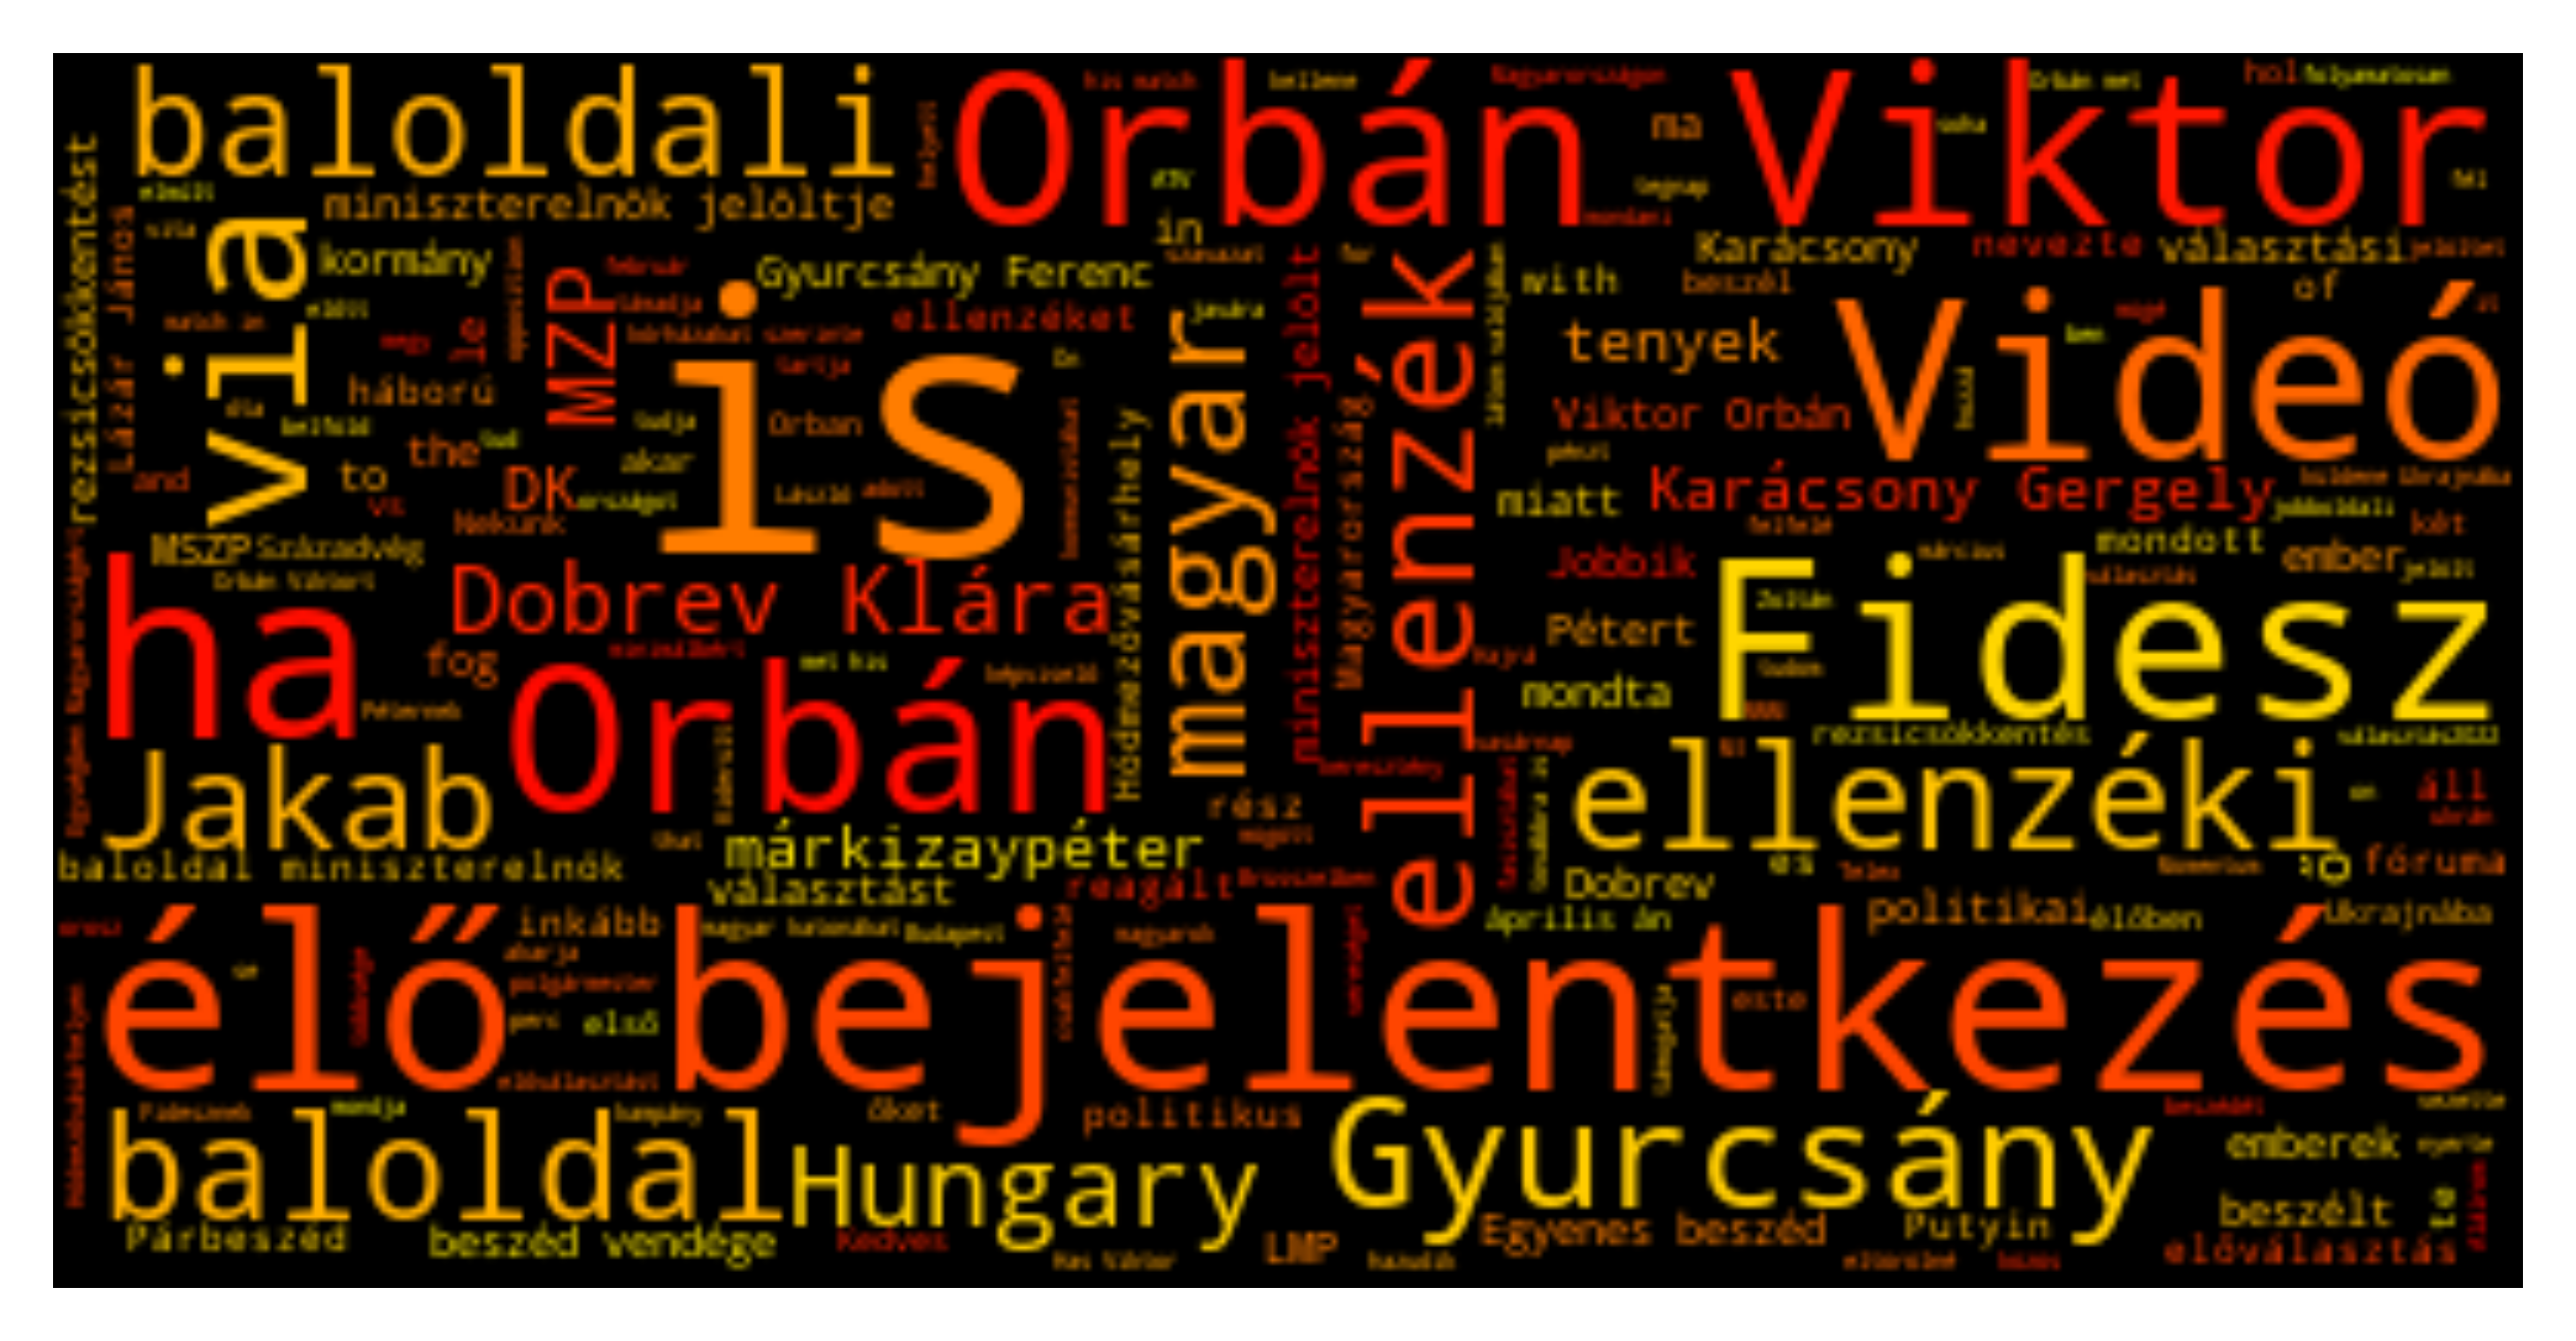

In [56]:
txt = " ".join(tweet for tweet in tweets_hu['tweet_full_text_processed'])
wordcloud = WordCloud(stopwords=stopwords, background_color ='black', colormap = 'autumn').generate(txt)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.gcf().set_dpi(600)
plt.show()

# 3. Sentiment analysis

### a) tweets with "und" language were detected with spacy, LanguageDetector library
### b) non-english tweets were translated to english by Google with translators library
### c) compound scores of english texts were detected by vaderSentiment script 
### (read further details on https://github.com/cjhutto/vaderSentiment)
### d) using sentiment categories:
#### 1 - 0.75: very positive
#### 0.75 - 0.5: positive
#### 0.5- -0.5: neutral
#### -0.5 - -0.75: negative
####  -0.75 - -1: very negative


## 3.1 Distribution of compound scores

In [57]:
tweets = df[df['original_tweet_id'] == 'None']
tweets_with_scores = tweets.merge(scores, on = 'tweet_id', how = 'inner')

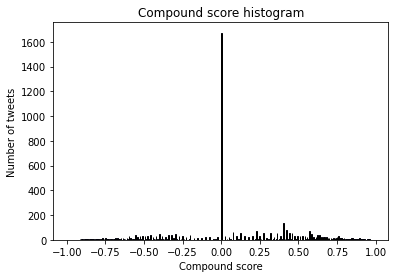

In [58]:
plt.hist(tweets_with_scores['compound'], color = 'blue', edgecolor = 'black', bins = 468)
plt.title('Compound score histogram')
plt.xlabel('Compound score')
plt.ylabel('Number of tweets')
plt.show()

In [59]:
stat = pd.DataFrame()

In [60]:
stat['total_count'] = [tweets_with_scores.count()['tweet_id']]
stat['positive_count'] = tweets_with_scores[(tweets_with_scores['compound'] >= 0.5)&
                                            (tweets_with_scores['compound'] < 0.75)].count()['tweet_id']
stat['very_positive_count'] = tweets_with_scores[tweets_with_scores['compound'] >= 0.75].count()['tweet_id']
stat['negative_count'] = tweets_with_scores[(tweets_with_scores['compound'] <= -0.5)&
                                            (tweets_with_scores['compound'] > -0.75)].count()['tweet_id']
stat['very_negative_count'] = tweets_with_scores[tweets_with_scores['compound'] <= -0.75].count()['tweet_id']

In [61]:
stat

total_count  positive_count  very_positive_count  negative_count  \
0         5127             606                  364             384   

   very_negative_count  
0                  160

## 3.2 Retweet statistics based on sentiments

In [62]:
retweet_count = df[df['original_tweet_id'] != 'None']\
                .groupby(['original_tweet_id'], as_index = False)\
                .agg(retweet_count = ('tweet_id', 'count'))

retweet_count['original_tweet_id'] = retweet_count['original_tweet_id'].astype('int64')
 
tweets_with_scores2 = scores\
                      .merge(retweet_count, right_on = 'original_tweet_id',
                             left_on = 'tweet_id',
                             how = 'left')
tweets_with_scores2['retweet_count'].fillna(0, inplace = True)

In [63]:
def _determine_sentiment(x):
    if x >= 0.5:
        sentiment = "positive"
    elif x <= -0.5:
        sentiment = "negative"
    else:
        sentiment = "neutral"
    return sentiment

In [64]:
tweets_with_scores2['sentiment'] = tweets_with_scores2['compound'].apply(lambda x: _determine_sentiment(x))
tweets_with_scores2.groupby(['sentiment'])['retweet_count'].describe()

count      mean        std  min  25%  50%  75%    max
sentiment                                                        
negative    544.0  1.540441   8.179964  0.0  0.0  0.0  1.0  134.0
neutral    3613.0  1.276502   4.801277  0.0  0.0  0.0  1.0  132.0
positive    970.0  2.146392  12.246826  0.0  0.0  0.0  1.0  289.0

## 3.3 Timeline of sentiments

In [65]:
tweets_with_scores['sentiment'] = tweets_with_scores['compound'].apply(lambda x: _determine_sentiment(x))
tweets_with_scores['week_of_the_date'] =  pd.to_datetime(tweets_with_scores['tweet_created_at'],
                                                         format = "%Y-%m-%d", 
                                                         errors='coerce').dt.to_period('W')\
                                                         .apply(lambda r: r.start_time).dt.date
pivot = tweets_with_scores\
          .groupby(['week_of_the_date', 'sentiment'], as_index = False)['tweet_id'].count()\
          .pivot(index= 'week_of_the_date', columns = 'sentiment', values= 'tweet_id')\
          .fillna(0)
          
pivot['total'] = pivot['positive'] + pivot['negative'] + pivot['neutral']
pivot['pos_ratio'] = pivot['positive'] / pivot['total']
pivot['neg_ratio'] = pivot['negative'] / pivot['total']
pivot['neu_ratio'] = pivot['neutral'] / pivot['total']

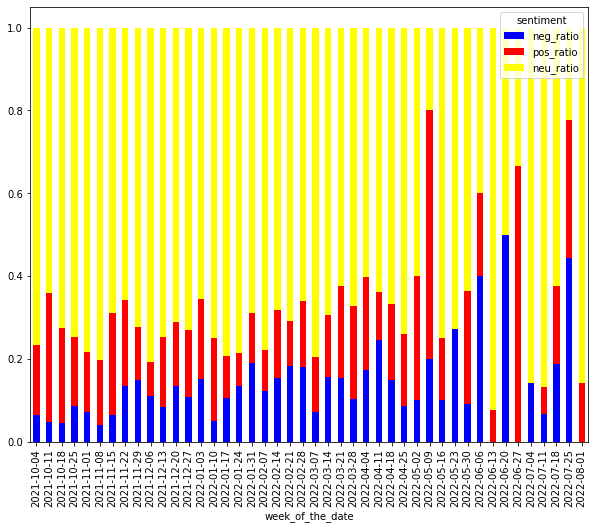

In [66]:
pivot[['neg_ratio','pos_ratio','neu_ratio']]\
.plot(kind = 'bar', stacked = True, color = ['blue', 'red', 'yellow'], figsize = (10, 8))
plt.show()


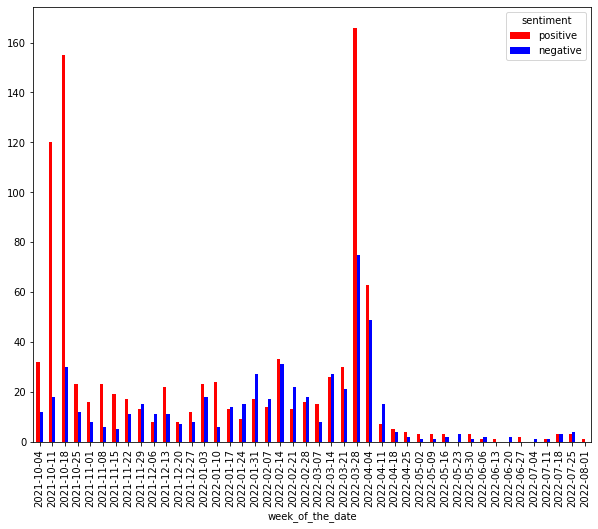

In [67]:
pivot[['positive','negative']]\
.plot(kind = 'bar', stacked = False, color = ['red', 'blue'], figsize = (10, 8))
plt.show()

## 3.4 Locations and sentiments

In [68]:
df_detected_locations_s = df_detected_locations.merge(tweets_with_scores, how = 'inner', on = 'tweet_id')
pivot2 = df_detected_locations_s\
          .groupby(['country', 'sentiment'], as_index = False)['tweet_id'].count()\
          .pivot(index= 'country', columns = 'sentiment', values= 'tweet_id')\
          .fillna(0)

pivot2['total'] = pivot2['positive'] + pivot2['negative'] + pivot2['neutral']
pivot2['pos_ratio'] = pivot2['positive'] / pivot2['total']
pivot2['neg_ratio'] = pivot2['negative'] / pivot2['total']
pivot2['neu_ratio'] = pivot2['neutral'] / pivot2['total']

pivot2 = pivot2[pivot2.index != 'Other'].sort_values('total', ascending =False).head(20)

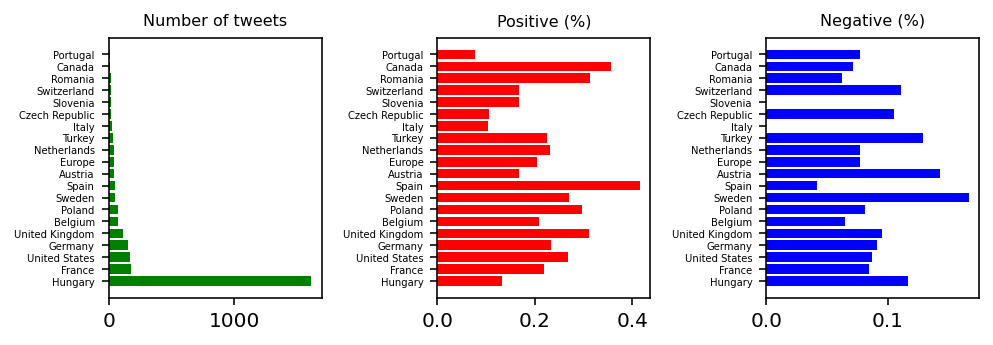

In [69]:
fig, ax = plt.subplots(1, 3, figsize=(7, 2.5), dpi=144, tight_layout=True)

index = [i for i in range(len(pivot2.index))]

ax[0].barh(y = pivot2.index, width = pivot2['total'], color = 'g')
ax[0].set_title('Number of tweets', fontsize = 8)
ax[0].tick_params(axis="y", labelsize=5)

ax[1].barh(pivot2.index, width = pivot2['pos_ratio'], color = 'r')
ax[1].set_title('Positive (%)', fontsize = 8)
ax[1].tick_params(axis="y", labelsize=5)

ax[2].barh(pivot2.index, width = pivot2['neg_ratio'], color = 'b')
ax[2].tick_params(axis="y", labelsize=5)
ax[2].set_title('Negative (%)', fontsize = 8)
plt.show()

## 3.5 Languages and sentiments

In [70]:
df_det_lang = pd.read_csv('tweets_detected_lang.csv', sep = ';')
detected_lang = tweets_with_scores.merge(df_det_lang, on = 'tweet_id', how = 'left')

detected_lang['tweet_language_y'].fillna(detected_lang['tweet_language_x'], inplace = True)

pivot3 = detected_lang\
          .groupby(['tweet_language_y', 'sentiment'], as_index = False)['tweet_id'].count()\
          .pivot(index= 'tweet_language_y', columns = 'sentiment', values= 'tweet_id')\
          .fillna(0)

pivot3['total'] = pivot3['positive'] + pivot3['negative'] + pivot3['neutral']

pivot3['pos_ratio'] = pivot3['positive'] / pivot3['total']
pivot3['neg_ratio'] = pivot3['negative'] / pivot3['total']
pivot3['neu_ratio'] = pivot3['neutral'] / pivot3['total']

pivot3 = pivot3.sort_values('total', ascending =False).head(10)

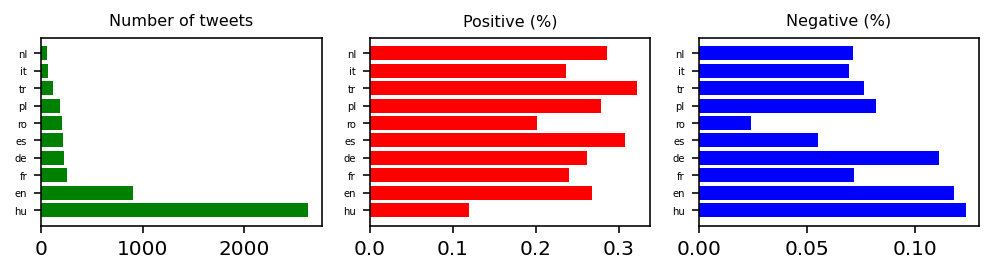

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(7, 2), dpi=144, tight_layout=True)

index = [i for i in range(len(pivot3.index))]

ax[0].barh(y = pivot3.index, width = pivot3['total'], color = 'g')
ax[0].set_title('Number of tweets', fontsize = 8)
ax[0].tick_params(axis="y", labelsize=5)

ax[1].barh(pivot3.index, width = pivot3['pos_ratio'], color = 'r')
ax[1].set_title('Positive (%)', fontsize = 8)
ax[1].tick_params(axis="y", labelsize=5)

ax[2].barh(pivot3.index, width = pivot3['neg_ratio'], color = 'b')
ax[2].tick_params(axis="y", labelsize=5)
ax[2].set_title('Negative (%)', fontsize = 8)
plt.show()